# Feature Importance

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
# external imports
%run ../common/utilities.ipynb

In [3]:
df_train = pd.read_csv("../input_data/train.csv")

In [4]:
feature_names = np.setdiff1d(df_train.columns, "FATAL")

In [5]:
feature_names

array(['AGE_0-17', 'AGE_18-20', 'AGE_21-30', 'AGE_31-40', 'AGE_41-50',
       'AGE_51-60', 'AGE_61-70', 'AGE_71-80', 'AGE_81-90', 'IMPAIRED_N',
       'IMPAIRED_Y', 'INVEHICLETYPE_2 wheeler', 'INVEHICLETYPE_Bus',
       'INVEHICLETYPE_Cargo Van', 'INVEHICLETYPE_Large/heavy Truck',
       'INVEHICLETYPE_Other Small/light Truck',
       'INVEHICLETYPE_Other Vehicle', 'INVEHICLETYPE_Passenger Car',
       'INVEHICLETYPE_Pickup Truck',
       'INVEHICLETYPE_Suv (sport Utility Vehicle)',
       'LICENSEPLATESTATE_AK', 'LICENSEPLATESTATE_AL',
       'LICENSEPLATESTATE_AR', 'LICENSEPLATESTATE_AZ',
       'LICENSEPLATESTATE_CA', 'LICENSEPLATESTATE_CO',
       'LICENSEPLATESTATE_CT', 'LICENSEPLATESTATE_DC',
       'LICENSEPLATESTATE_DE', 'LICENSEPLATESTATE_FL',
       'LICENSEPLATESTATE_GA', 'LICENSEPLATESTATE_HI',
       'LICENSEPLATESTATE_IA', 'LICENSEPLATESTATE_ID',
       'LICENSEPLATESTATE_IL', 'LICENSEPLATESTATE_IN',
       'LICENSEPLATESTATE_KS', 'LICENSEPLATESTATE_KY',
       'LICENSEPL

## 1. Logistic Regression

In [6]:
logistic_regression = load_object("./best_saved_models/", "logistic_regression")

In [7]:
intercept = logistic_regression[0].intercept_[0]
coefficients = logistic_regression[0].coef_[0]

In [8]:
intercept

-4.97059868808003

In [9]:
coefficients

array([-0.91148234, -1.12857921, -0.45084007, -0.76021629, -0.67073872,
       -0.72165615, -1.00991294, -0.85190814, -0.98804811,  0.89870162,
       -0.89864081,  1.41484919, -0.92360441, -0.76484886, -0.64051336,
       -0.64894944,  0.37036654,  1.08821046, -0.75940437, -0.21772473,
       -0.11631659, -0.27078157, -0.21548116, -0.32263185,  0.09920856,
       -0.16287741, -0.25736628,  2.39470541, -0.03524068, -0.38266304,
       -0.02097524, -0.08785679,  0.09041979, -0.11825054, -0.05203036,
        0.28597934, -0.11285116, -0.23403636, -0.18413599, -0.04111973,
        2.33206025, -0.24872436, -0.02711555, -0.22696767, -0.17233898,
       -0.16613265, -0.10624375,  0.15186889, -0.10593525, -0.12106496,
       -0.17522407, -0.36520447, -0.1122733 , -0.13038684,  0.28767864,
       -0.3596151 , -0.25434484, -0.14681188, -0.44262773, -0.19003595,
       -0.29212775, -0.07958399, -0.27978633, -0.10381128, -0.16227764,
        1.51089107, -0.08730618, -0.2013867 , -0.25746664, -0.21

In [10]:
feature_importance_lr = pd.DataFrame(feature_names, columns=["features"])
feature_importance_lr["importance"] = np.exp(coefficients)
feature_importance_lr = feature_importance_lr.sort_values(by=["importance"], ascending=False)

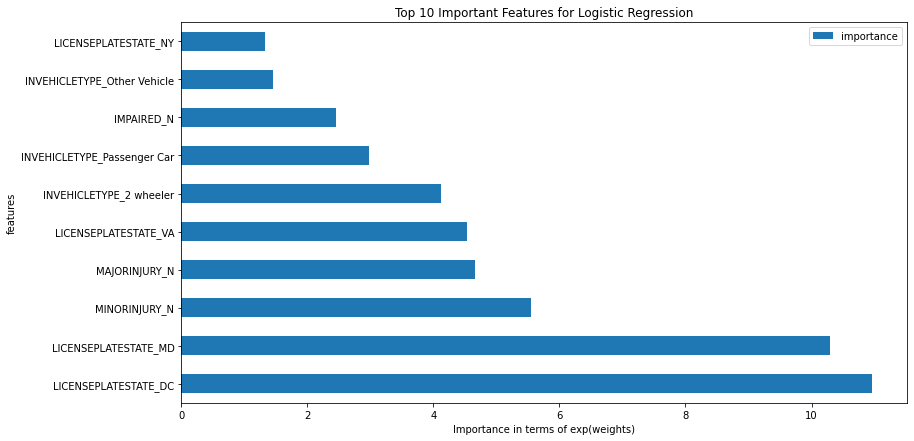

In [11]:
feature_importance_lr.head(10).plot.barh(x="features", y="importance", figsize=(13, 7))
plt.title("Top 10 Important Features for Logistic Regression")
plt.xlabel("Importance in terms of exp(weights)")
plt.show()

## 2. Decision Tree

In [12]:
dt = load_object("./best_saved_models/", "decision_tree")

In [13]:
dt[0].feature_importances_

array([0.0032714 , 0.00836847, 0.0041605 , 0.00253341, 0.00047978,
       0.0004258 , 0.        , 0.00288739, 0.00617857, 0.01483815,
       0.03027361, 0.04427945, 0.01313527, 0.00762723, 0.01121083,
       0.00838593, 0.00599025, 0.04226479, 0.00753596, 0.00229484,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.15679948, 0.00185805, 0.        ,
       0.0029032 , 0.        , 0.        , 0.        , 0.0024925 ,
       0.00314536, 0.        , 0.        , 0.        , 0.00192625,
       0.2011425 , 0.        , 0.002601  , 0.        , 0.        ,
       0.        , 0.        , 0.00426092, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00176745,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.08795088, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.0673396 , 0.03200974, 0.18119

In [14]:
feature_importance_dt = pd.DataFrame(feature_names, columns=["features"])
feature_importance_dt["importance"] = dt[0].feature_importances_
feature_importance_dt = feature_importance_dt.sort_values(by=["importance"], ascending=False)

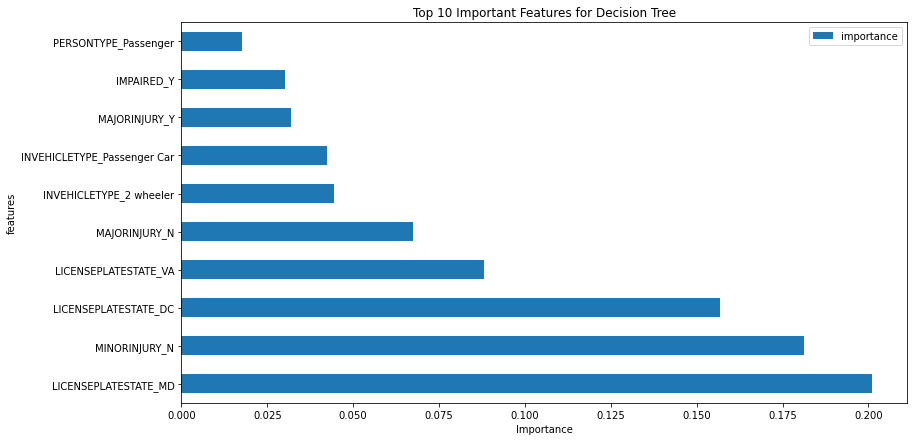

In [15]:
feature_importance_dt.head(10).plot.barh(x="features", y="importance", figsize=(13, 7))
plt.title("Top 10 Important Features for Decision Tree")
plt.xlabel("Importance")
plt.show()

## 3. Random Forest

In [16]:
rfc = load_object("./best_saved_models/", "random_forest")

In [17]:
rfc[0].feature_importances_

array([6.27228335e-03, 9.47981969e-03, 1.15997560e-02, 9.90269949e-03,
       8.47452185e-03, 8.41083424e-03, 1.03027954e-02, 3.87555826e-03,
       4.42033555e-03, 1.50594895e-02, 1.67797391e-02, 4.62176705e-02,
       1.69045091e-02, 9.09654288e-03, 1.64318785e-02, 9.20140829e-03,
       1.42721443e-02, 3.73791060e-02, 1.92573176e-02, 1.78397974e-02,
       1.59007108e-05, 5.05552613e-04, 1.74425076e-04, 2.37115110e-03,
       8.83246362e-04, 8.82508697e-05, 5.30353471e-04, 1.60882121e-01,
       1.65080883e-03, 3.61239314e-03, 1.38940962e-03, 1.14979150e-05,
       4.13643148e-04, 1.45064659e-05, 1.69860073e-03, 2.24490893e-03,
       0.00000000e+00, 2.30418506e-04, 1.15664754e-04, 2.18411827e-03,
       1.01237744e-01, 6.68991416e-04, 1.23657961e-03, 5.01398234e-04,
       1.33383783e-04, 1.35174793e-04, 0.00000000e+00, 3.07835790e-03,
       9.36317969e-06, 0.00000000e+00, 1.01574626e-04, 2.70768866e-03,
       5.39780566e-05, 6.62657202e-19, 3.60508274e-03, 1.80281524e-03,
      

In [18]:
feature_importance_rfc = pd.DataFrame(feature_names, columns=["features"])
feature_importance_rfc["importance"] = rfc[0].feature_importances_
feature_importance_rfc = feature_importance_rfc.sort_values(by=["importance"], ascending=False)

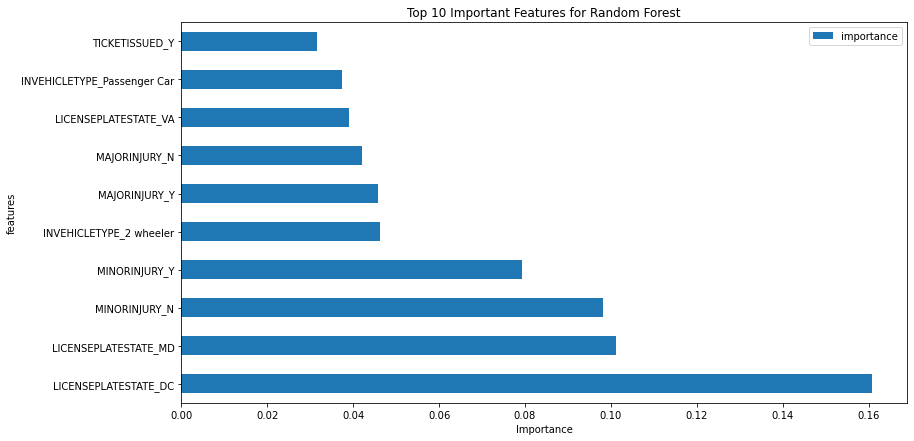

In [19]:
feature_importance_rfc.head(10).plot.barh(x="features", y="importance", figsize=(13, 7))
plt.title("Top 10 Important Features for Random Forest")
plt.xlabel("Importance")
plt.show()

## 4. XGBoost

In [20]:
xgb = load_object("./best_saved_models/", "XGBoost")

In [21]:
xgb[0].feature_importances_

array([0.01139224, 0.01267715, 0.01053369, 0.01146654, 0.00895619,
       0.00862273, 0.00972488, 0.0117234 , 0.01014259, 0.02365449,
       0.        , 0.04147148, 0.01248678, 0.01942218, 0.01094059,
       0.01435281, 0.        , 0.03083467, 0.03770734, 0.01530243,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.08024147, 0.01582794, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.0091884 ,
       0.16275321, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.01007086, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.01045538,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.10355821, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.08926781, 0.        , 0.13188

In [22]:
feature_importance_xgb = pd.DataFrame(feature_names, columns=["features"])
feature_importance_xgb["importance"] = xgb[0].feature_importances_
feature_importance_xgb = feature_importance_xgb.sort_values(by=["importance"], ascending=False)

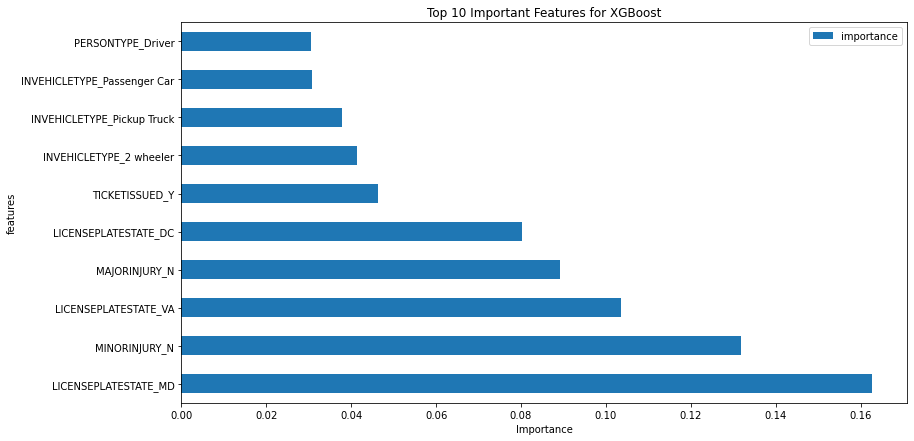

In [23]:
feature_importance_xgb.head(10).plot.barh(x="features", y="importance", figsize=(13, 7))
plt.title("Top 10 Important Features for XGBoost")
plt.xlabel("Importance")
plt.show()

# References:

- https://sefiks.com/2021/01/06/feature-importance-in-logistic-regression/
- https://christophm.github.io/interpretable-ml-book/logistic.html
- https://machinelearningmastery.com/calculate-feature-importance-with-python/